### **Death & Recovery based on Gender**

MALE_RECOVERED  :  365
FEMALE_RECOVERED  :  139
[365, 139]


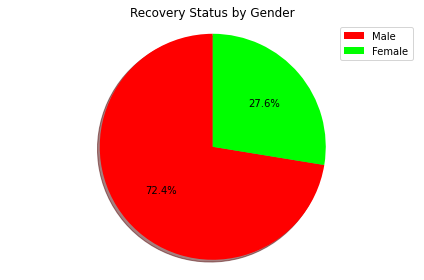

MALE_DEATH  :  356
FEMALE_DEATH  :  142
[356, 142]


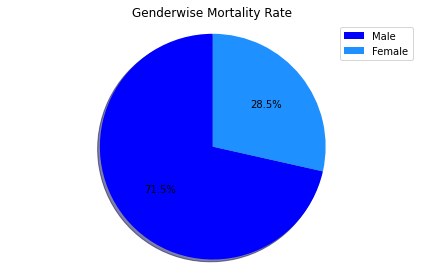

In [22]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt


df = pd.read_csv("covidDataset.csv")
colors = ['#FF0000','lime']
#'#00C957','#FFD700','#ffcc99','#99ff99','#FF34B3'
sizes = []

key_counts = {}
key_counts1 = {}
key_counts['male_recovered'] = 0 
key_counts['female_recovered'] = 0
key_counts1['male_death'] = 0
key_counts1['female_death'] = 0

for gender,status in zip(df['Gender'],df['Status']):
  if gender == 'Male':
    if status == 'Recovered':
      key_counts['male_recovered'] += 1
    else:
      key_counts1['male_death'] += 1
  else :
    if status == 'Recovered':
      key_counts['female_recovered'] += 1
    else:
      key_counts1['female_death'] += 1

for key,value in key_counts.items():
  print(key.upper()," : ",value)
  sizes.append(value)
print(sizes)

fig1, ax1 = plt.subplots()
plt.title("Recovery Status by Gender")
ax1.pie(sizes, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(["Male","Female"])
plt.show()

sizes = []

for key,value in key_counts1.items():
  print(key.upper()," : ",value)
  sizes.append(value)
print(sizes)

fig1, ax1 = plt.subplots()
plt.title("Genderwise Mortality Rate")
ax1.pie(sizes, colors=['blue','dodgerblue'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(["Male","Female"])
plt.show()

### **Death and Recovery based on Vaccination Status**

VACCINATED_RECOVERED  :  242
NOT_VACCINATED_RECOVERED  :  262
[242, 262]


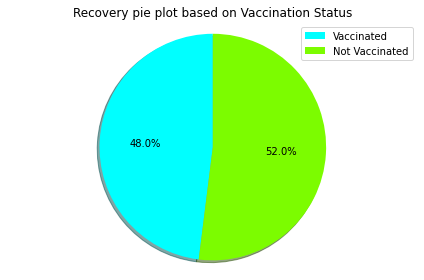

VACCINATED_DEATH  :  248
NOT_VACCINATED_DEATH  :  250
[248, 250]


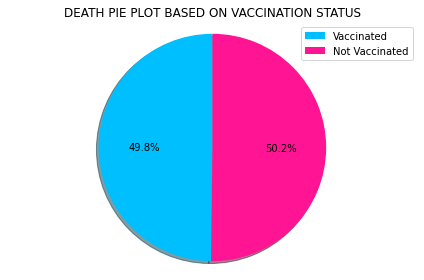

In [11]:

import pandas as pd
import numpy
import matplotlib.pyplot as plt
import tkinter

df = pd.read_csv("covidDataset.csv")
key_counts = {}
key_counts1 = {}
key_counts['Vaccinated_recovered'] = 0 
key_counts['Not_Vaccinated_recovered'] = 0
key_counts1['Vaccinated_death'] = 0
key_counts1['Not_Vaccinated_death'] = 0

sizes = []
for Vaccination,status in zip(df['Vaccination Status'],df['Status']):
  if Vaccination == 'Vaccinated':
    if status == 'Recovered':
      key_counts['Vaccinated_recovered'] += 1
    else:
      key_counts1['Vaccinated_death'] += 1
  else :
    if status == 'Recovered':
      key_counts['Not_Vaccinated_recovered'] += 1
    else:
      key_counts1['Not_Vaccinated_death'] += 1

for key,value in key_counts.items():
  print(key.upper()," : ",value)
  sizes.append(value)
print(sizes)

fig1, ax1 = plt.subplots()
plt.title("Recovery pie plot based on Vaccination Status")
ax1.pie(sizes, colors=['#00FFFF','lawngreen'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(["Vaccinated","Not Vaccinated"])
plt.show()

sizes = []

for key,value in key_counts1.items():
  print(key.upper()," : ",value)
  sizes.append(value)
print(sizes)

fig1, ax1 = plt.subplots()
plt.title("DEATH PIE PLOT BASED ON VACCINATION STATUS")
ax1.pie(sizes, colors=['deepskyblue','deeppink'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(["Vaccinated","Not Vaccinated"])

plt.show()

### **Strip Plot**

Rows left: 1,002
    Age AgeGroup
34   19    44-60
55   17    44-60
43   17    44-60
48   16    44-60
47   16    44-60
..  ...      ...
57    6    18-44
1     6    18-44
51    5    18-44
82    5    18-44
27    4    18-44

[95 rows x 2 columns]


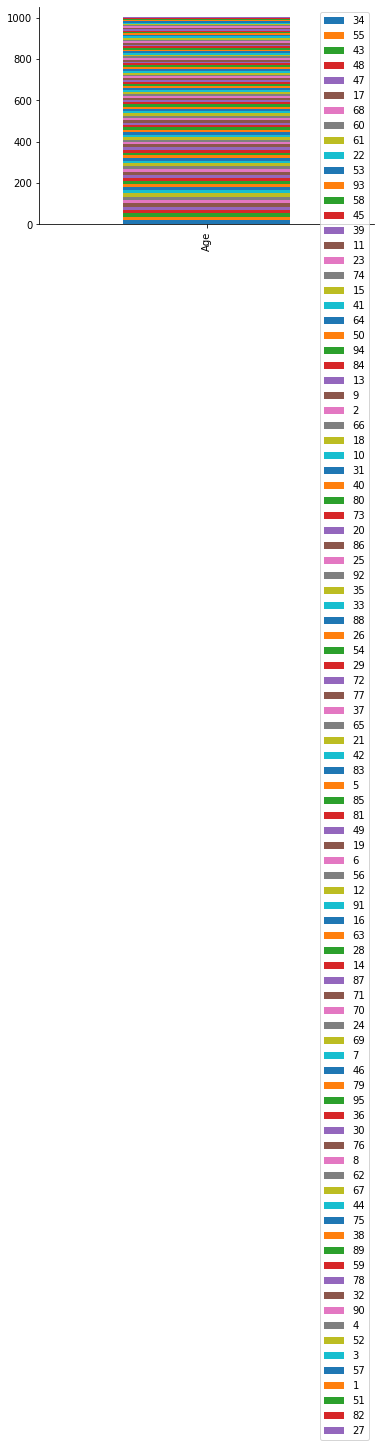

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo

df = pd.read_csv("covidDataset.csv")
df_status = df['Status']
df_count = df_status.value_counts()
df_count
df_count = df_count.reindex(index = ["Death" , "Recovered"])
df_count

data = df[["Age"]]
data = data.query("(Age >= 0) and (Age <= 100)")

is_integer = lambda row: int(row["Age"]) == row["Age"]
data = data[data.apply(is_integer, axis="columns")]

data = data.dropna(axis="rows", how="any", subset=["Age"])
print(f"Rows left: {data.shape[0]:,}")

age_counts = data["Age"].value_counts()
bins= [0,2,4,13,20,110] 
X_train_data = pd.DataFrame({'Age':age_counts})
labels = ['0-14','15-17','18-44','44-60','Above 60']
X_train_data['AgeGroup'] = pd.cut(X_train_data['Age'],bins = bins, labels=labels, right=False)
print (X_train_data)
ax = pd.DataFrame(age_counts).T.plot.bar(stacked=True)
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


### **Date wise bar graph on Death and Recovery**


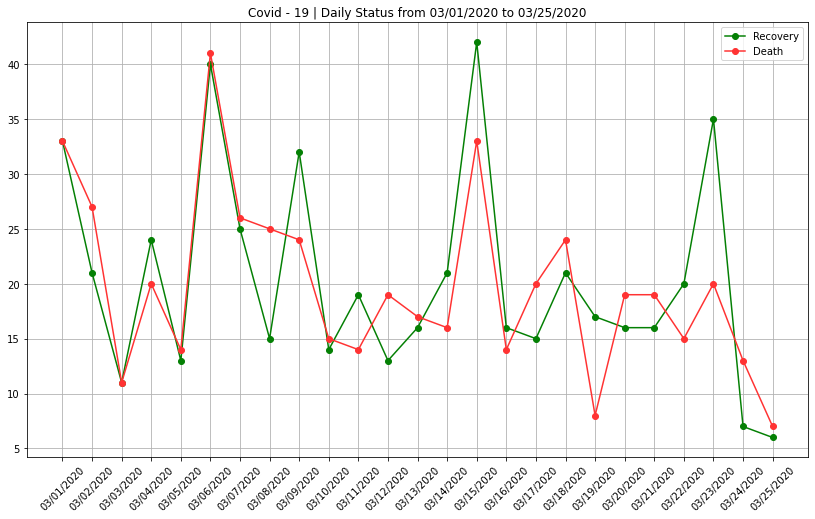

In [ ]:
date_list = df['Date'].unique()
# print(date_list)
death_date_data = {date:0 for date in date_list}
recovery_date_data = {date:0 for date in date_list}
# print(death_date_data)
# print(recovery_date_data)
for date,status in zip(df['Date'],df['Status']):
  if status == "Recovered":
    recovery_date_data[f'{date}']+=1
  else:
    death_date_data[f'{date}']+=1

li = (recovery_date_data.items())
li2 = (death_date_data.items())
# print(li)
x,y = zip(*li)
# print(x)
# print(y)
x1,y1 = zip(*li2)
plt.figure(figsize=[14,8])
#uncomment to make it dark mode
# plt.style.use('dark_background')
plt.title(f"Covid - 19 | Daily Status from {date_list[0]} to {date_list[-1]}")
plt.plot(x,y,marker='o',label="Recovery",color='#048004')
plt.plot(x1,y1,marker='o',label="Death",color='#FF3333')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

### **Test Code ( Don't touch this )**

In [ ]:
import plotly.express as px

dataset = pd.DataFrame(columns=["Date","Recovery Count","Death Count"])
for i,j in zip(recovery_date_data,death_date_data):
  dataset = dataset.append(pd.DataFrame({
      "Date":[i],
      "Recovery Count":recovery_date_data[i],
      "Death Count":death_date_data[j],
  }))

fig = px.line(dataset, x="Date", y="Recovery Count",markers=True)
fig.add_scatter(x=dataset['Date'], y=dataset['Death Count'], mode='markers+lines')
fig.show()